In [2]:
import pandas as pd
from datetime import datetime


df = pd.read_csv("final_merged_dataset (1).csv")
df['price'] = ((df['Min Price (Rs./Quintal)'] + df['Max Price (Rs./Quintal)']) / 2) / 100
df['price_in_q'] = ((df['Min Price (Rs./Quintal)'] + df['Max Price (Rs./Quintal)']) / 2) 

print(df['Grade'].unique())
print(df['Variety'].unique())
print(df['Commodity'].unique())
print(df['District Name'].unique())
price_date = pd.to_datetime(df['Price Date'])
target = df.price

['FAQ' 'Non-FAQ' 'Large' 'Medium' 'Small']
['Other' 'Spinach' 'Turnip' 'Walnut' 'Local' 'Potato' 'Desi' 'F.A.Q.'
 'Red' 'Kufri Khasi_garo' 'Jyoti' '(Red Nanital)' 'Pomogranate' 'Plum'
 'Puna' '1st Sort' 'Nasik' 'Onion' 'Mashrooms' 'Black' 'Green'
 'Green Ginger' 'Little gourd (Kundru)' 'Pears' 'Peach' 'Average' 'Garlic'
 'China' 'Beetroot' 'Bhindi' 'Carrot' 'Cherry' 'Cabbage' 'Cucumbar'
 'Cauliflower' 'Delicious' 'American' 'Condition' 'Golden' 'Hajratbali'
 'Kullu Royal Delicious' 'Rizakwadi' 'Apple' 'Maharaji' 'Kesri'
 'Royal Delicious' 'Kasmir/Shimla - II' 'Simla' 'Apricot(Jardalu/Khumani)'
 'Medium' 'Amruthapani' 'Banana - Ripe']
['Spinach' 'Turnip' 'Walnut' 'Potato' 'Pomegranate' 'Plum' 'Onion'
 'Ginger(Dry)' 'Mashrooms' 'Grapes' 'Ginger(Green)'
 'Little gourd (Kundru)' 'Pear(Marasebu)' 'Peach' 'Garlic' 'Beetroot'
 'Bhindi(Ladies Finger)' 'Carrot' 'Cherry' 'Cabbage' 'Cucumbar(Kheera)'
 'Cauliflower' 'Apple' 'Apricot(Jardalu/Khumani)' 'Banana']
['Jammu' 'Anantnag' 'Kathua' 'Srinaga

/tmp/ipykernel_29807/1566962448.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  price_date = pd.to_datetime(df['Price Date'])


KeyboardInterrupt: 

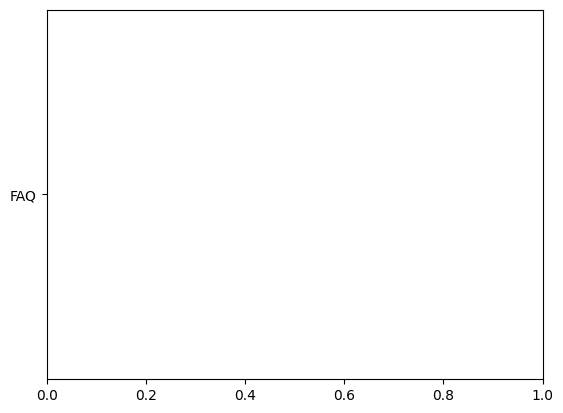

In [2]:
from matplotlib import pyplot as plt
# df['price'] = ((df['Min Price (Rs./Quintal)'] + df['Max Price (Rs./Quintal)']) / 2) / 100
# # df['price_in_q'] = ((df['Min Price (Rs./Quintal)'] + df['Max Price (Rs./Quintal)']) / 2) 

# print(df['Grade'].unique())
# print(df['Variety'].unique())
# print(df['Commodity'].unique())
# print(df['District Name'].unique())

plt.bar(df['price'],df['Grade'])
plt.show()


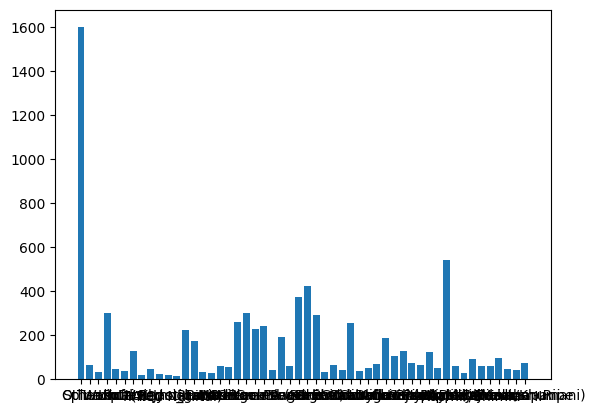

In [ ]:
plt.bar(df['Variety'], df['price'])
plt.show()


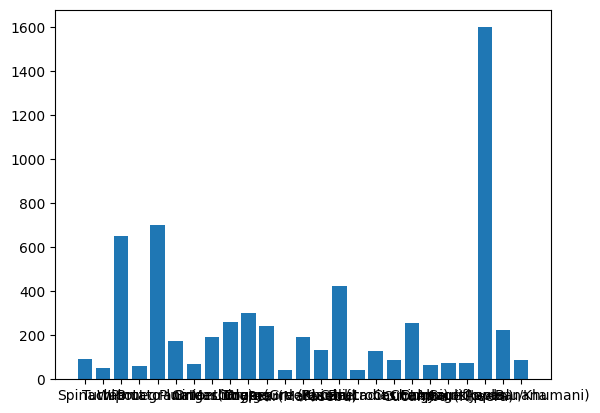

In [ ]:
plt.bar(df['Commodity'], df['price'])
plt.show()

In [3]:
target

0          8.0
1          8.0
2          9.0
3          9.0
4          9.0
          ... 
102201    46.0
102202    46.0
102203    46.0
102204    46.0
102205    46.0
Name: price, Length: 102206, dtype: float64

In [3]:
new_df = df.drop(columns=['price','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Temperature','Price Date','Modal Price (Rs./Quintal)'],axis='columns')  
new_df

,District Name,Market Name,Commodity,Variety,Grade,price_in_q
0,Jammu,Akhnoor,Spinach,Other,FAQ,800.0
1,Jammu,Akhnoor,Spinach,Other,FAQ,800.0
2,Jammu,Akhnoor,Spinach,Other,FAQ,900.0
3,Jammu,Akhnoor,Spinach,Other,FAQ,900.0
4,Jammu,Akhnoor,Spinach,Other,FAQ,900.0
...,...,...,...,...,...,...
102201,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0
102202,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0
102203,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0
102204,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0


In [4]:
month = [] 
year = [] 

for date in pd.to_datetime(df['Price Date']):
    month.append(date.month)
    year.append(date.year)

new_df['month'] = month 
new_df['year'] = year 
new_df


/tmp/ipykernel_29807/3346385568.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  for date in pd.to_datetime(df['Price Date']):


,District Name,Market Name,Commodity,Variety,Grade,price_in_q,month,year
0,Jammu,Akhnoor,Spinach,Other,FAQ,800.0,12,2020
1,Jammu,Akhnoor,Spinach,Other,FAQ,800.0,2,2021
2,Jammu,Akhnoor,Spinach,Other,FAQ,900.0,3,2021
3,Jammu,Akhnoor,Spinach,Other,FAQ,900.0,1,2021
4,Jammu,Akhnoor,Spinach,Other,FAQ,900.0,3,2021
...,...,...,...,...,...,...,...,...
102201,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0,5,2023
102202,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0,5,2023
102203,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0,5,2023
102204,Udhampur,Udhampur,Banana,Banana - Ripe,Medium,4600.0,5,2023


In [5]:
from sklearn.preprocessing import LabelEncoder
district_list = []

le = LabelEncoder()

new_df['district_label'] = le.fit_transform(new_df['District Name'])
new_df['market_label'] = le.fit_transform(new_df['Market Name'])
new_df['commodity_label'] = le.fit_transform(new_df['Commodity'])
new_df['variety_label'] = le.fit_transform(new_df['Variety'])
new_df['grade_label'] = le.fit_transform(new_df['Grade'])

new_df.to_json("data.json",orient='records')
  

In [7]:
import json 
df2 = pd.read_json("data.json")

district_data = {}
market_data = {}
commodity_data = {}
vaierty_data = {}
grade_data = {}

for district in df2['District Name'].unique():
    new_Data = df2[df2['District Name'] == district]['district_label']
    district_data[int(new_Data.unique()[0])] = district

for district in df2['Market Name'].unique():
    new_Data = df2[df2['Market Name'] == district]['market_label']
    market_data[int(new_Data.unique()[0])] = district

for district in df2['Commodity'].unique():
    new_Data = df2[df2['Commodity'] == district]['commodity_label']
    commodity_data[int(new_Data.unique()[0])]=district

for district in df2['Variety'].unique():
    new_Data = df2[df2['Variety'] == district]['variety_label']
    vaierty_data[int(new_Data.unique()[0])]=district

for district in df2['Grade'].unique():
    new_Data = df2[df2['Grade'] == district]['grade_label']
    grade_data[int(new_Data.unique()[0])]=district


with open("./data/district_data.json", "w") as fp1:
    fp1.write(json.dumps(district_data))
    fp1.close()

with open("./data/commodity_data.json", "w") as fp2:
    fp2.write(json.dumps(commodity_data))

with open("./data/vaierty_data.json", "w") as fp3:
    fp3.write(json.dumps(vaierty_data))

with open("./data/grade_data.json", "w") as fp4:
    fp4.write(json.dumps(grade_data))

with open("./data/market_data.json", "w") as fp5:
    fp5.write(json.dumps(market_data))


In [25]:
df_new_one = new_df.drop(columns=['District Name','Market Name','Commodity','Variety','Grade'],axis='columns')
df_new_one


,price_in_q,month,year,district_label,market_label,commodity_label,variety_label,grade_label
0,800.0,12,2020,3,0,22,38,0
1,800.0,2,2021,3,0,22,38,0
2,900.0,3,2021,3,0,22,38,0
3,900.0,1,2021,3,0,22,38,0
4,900.0,3,2021,3,0,22,38,0
...,...,...,...,...,...,...,...,...
102201,4600.0,5,2023,9,16,2,7,2
102202,4600.0,5,2023,9,16,2,7,2
102203,4600.0,5,2023,9,16,2,7,2
102204,4600.0,5,2023,9,16,2,7,2


In [ ]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train  = train_test_split(df_new_one,target, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(X_train.columns)
print(len(y_train))

20442
Index(['month', 'year', 'district_label', 'market_label', 'commodity_label',
       'variety_label', 'grade_label'],
      dtype='object')
20442


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
linear_model = LinearRegression()
decision_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
# model.fit(df_num_tr, df_labels)
linear_model.fit(X_train,y_train)
decision_model.fit(X_train,y_train)
random_forest_model.fit(X_train,y_train)
print(linear_model.score)

<bound method RegressorMixin.score of LinearRegression()>


In [ ]:
from sklearn.metrics import r2_score, confusion_matrix

linear_predict = linear_model.predict(X_test)
print(r2_score(y_test,linear_predict))


decision_model_predict = decision_model.predict(X_test)
print(r2_score(y_test,decision_model_predict))


random_forest_model_predict = random_forest_model.predict(X_test)
print(r2_score(y_test,random_forest_model_predict))




0.11906076285257228
0.9422314661576464
0.9474088077979778


In [ ]:
import matplotlib.pyplot as plt 
from numpy import array
y_predict = linear_model.predict([[11,2025,0,7,0,38,2]])

# [4509.93954043]
# [5102.46407418]
# [5694.98860792]



# linear_model.predict()
print(y_predict)
# print(y_test)

[56.94988608]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(random_forest_model,open('random_forest_model.pkl','wb'))

In [ ]:
with open('random_forest_model.pkl', 'rb') as file:  # Open in binary read mode
    model = pickle.load(file)
    print(model.predict([[11,2022,0,7,0,38,2]]))

[14.40557612]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from langchain_community.chat_models import ChatOllama
from langchain.schema import HumanMessage


user_input = f"I create a model which has 7 parameter. My prediction in {y_predict} and input is {[11,2025,0,7,0,38,2]}. I am using linear regression. Tell me the answer is correct or not."
print(user_input)
chat_model = ChatOllama(model="llama3.2")

response = chat_model([HumanMessage(content=user_input)])
print(response)


I create a model which has 7 parameter. My prediction in [5694.98860792] and input is [11, 2025, 0, 7, 0, 38, 2]. I am using linear regression. Tell me the answer is correct or not.


/tmp/ipykernel_4770/3585302339.py:7: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  chat_model = ChatOllama(model="llama3.2")
/tmp/ipykernel_4770/3585302339.py:9: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chat_model([HumanMessage(content=user_input)])


ConnectionError: HTTPConnectionPool(host='localhost', port=11434): Max retries exceeded with url: /api/chat (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x770be2f62690>: Failed to establish a new connection: [Errno 111] Connection refused'))